In [1]:
import sys
import os
import glob


In [2]:
import numpy as np
import matplotlib.pyplot as pl
import audacity
import TransferFunctions as tf
import scipy.signal as sig

%matplotlib notebook

List of audacity files

In [5]:
datadir = os.path.join('C:\\Users\\acoustics','My Documents\\GitHub\\legato-transients\\transfer')

glob.glob(os.path.join(datadir,'*.aup'))
#os.listdir(os.path.join(datadir))

['C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_1850.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_2850.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_3850.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_4850.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_5850.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_6850.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_open.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_reference.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tie_clip_comparison.aup']

Load File, read data, and pad to have same length on all channels

In [17]:
au = audacity.Aup('C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\key_only_recordings\\calibration\\2tie_clip_comparison.aup')

In [18]:
rdata = []
maxl = 0
for ii in range(au.nchannels):
    rdata.append(au.get_channel_data(ii))
    print('Channel %d: %d samples'%(ii,len(rdata[-1])))
    maxl = max(maxl,len(rdata[-1]))

data = np.zeros((maxl,len(rdata)))
for ii,rd in enumerate(rdata):
    data[:len(rd),ii]=rd

Channel 0: 1323000 samples
Channel 1: 1323520 samples
Channel 2: 1323520 samples


Check for delay between loudspeaker output (ch 0) and mic inputs (ch 1-3)

<IPython.core.display.Javascript object>


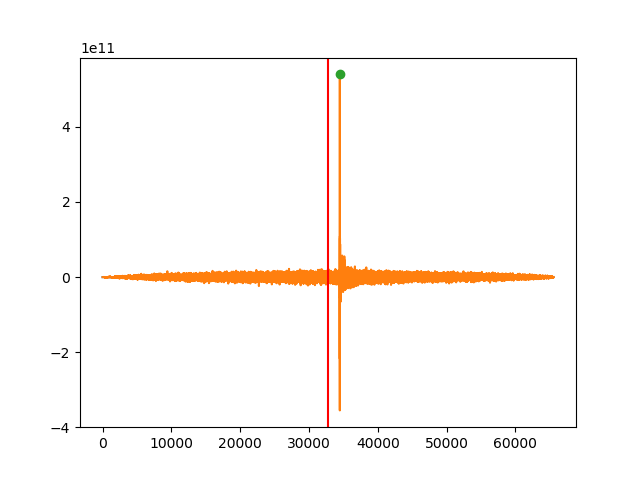

Delay: 1719 samples


In [19]:
fig,ax=pl.subplots(1)
delay=tf.determineDelay(data[:,0]/np.mean(data[:,0]),data[:,1]/np.mean(data[:,1]),maxdel=2**15,ax=ax)
print("Delay: %d samples"%delay)

Remove the delay by circular-shifting

In [20]:
data[:,0]=np.roll(data[:,0],delay)

Check that the shift was in the right direction

<IPython.core.display.Javascript object>


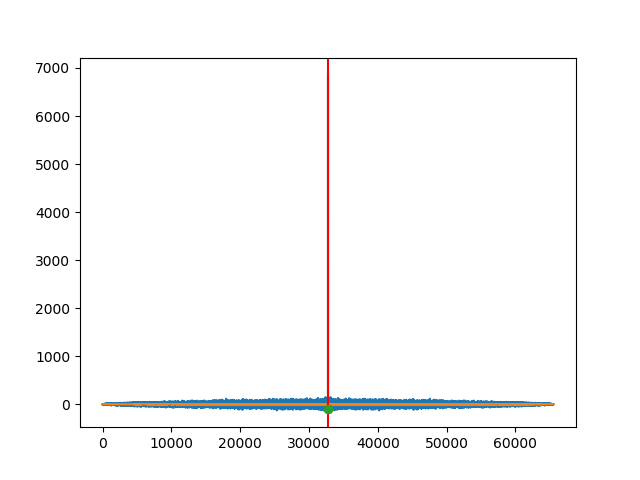

Delay: 0 samples


In [21]:
fig,ax=pl.subplots(1)
delay=tf.determineDelay(data[:,0],data[:,1],maxdel=2**15,ax=ax)
print("Delay: %d samples"%delay)

Calulate transfer functions 

<IPython.core.display.Javascript object>


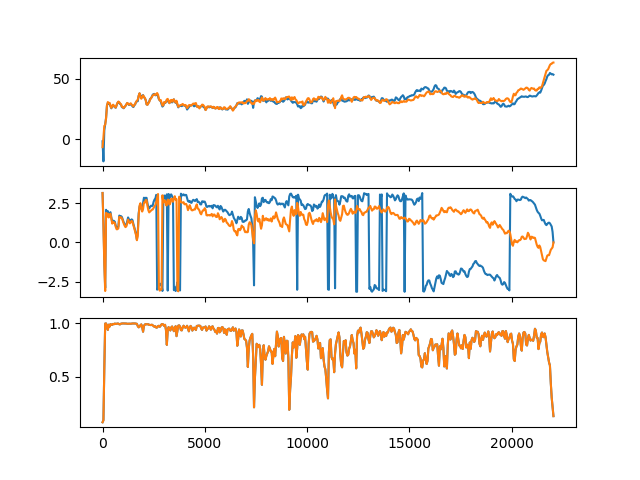

In [38]:
fig,ax = pl.subplots(3,sharex=True)

sr=au.rate
nfft=1024
for ii in range(1,3):
    tfxy,ff=tf.tfe(data[:,0],data[:,ii],Fs=sr,NFFT=nfft)
    ax[0].plot(ff,20*np.log10(np.abs(tfxy)))
    ax[1].plot(ff,(np.angle(tfxy)))
    ff,coh=sig.coherence(data[:,1],data[:,2],fs=sr,nperseg=nfft)

    ax[2].plot(ff,coh)
    

<IPython.core.display.Javascript object>


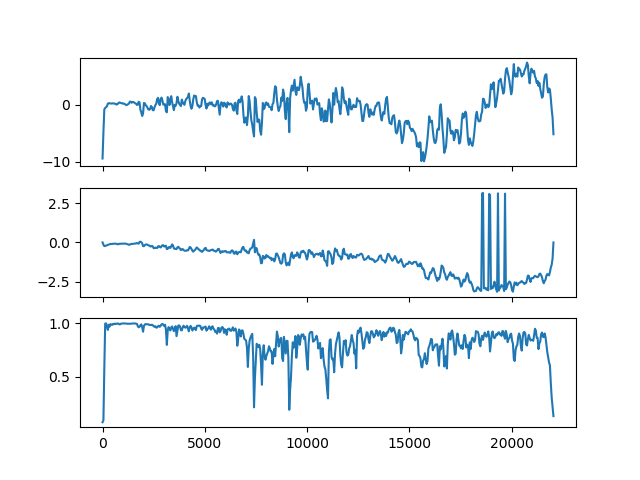

In [37]:
fig,ax = pl.subplots(3,sharex=True)

sr=au.rate
nfft=1024
tfxy,ff=tf.tfe(data[:,1],data[:,2],Fs=sr,NFFT=nfft)
ax[0].plot(ff,20*np.log10(np.abs(tfxy)))
ax[1].plot(ff,(np.angle(tfxy)))
#coh,ff=tf.cohere(data[:,1],data[:,2],Fs=sr,NFFT=nfft)
ff,coh=sig.coherence(data[:,1],data[:,2],fs=sr,nperseg=nfft)
ax[2].plot(ff,coh)


In [30]:
tf.cohere?

In [35]:
sig.coherence?